# 비트트레이더

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
import statsmodels.api as sm
from sklearn import linear_model
from tqdm import tnrange, tqdm_notebook
from sklearn.metrics import mean_squared_error
from statsmodels.regression.quantile_regression import QuantReg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pandas==0.25.0

In [ ]:
! pip show pandas_profiling

Name: pandas-profiling
Version: 1.4.1
Summary: Generate profile report for pandas DataFrame
Home-page: http://github.com/jospolfliet/pandas-profiling
Author: Jos Polfliet
Author-email: jos.polfliet+panpro@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, matplotlib, jinja2, six
Required-by: 


## 데이터 불러오기

In [ ]:
train_raw = pd.read_csv('/content/drive/MyDrive/Dacon/비트코인 예측/data/train_x_df.csv')
train_x_df= train_raw
train_x_df

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.010004,1.010004,1.009612,1.010004,8.382875e+05,43160.632812,451.157288,7.326834e+05,37725.183594
1,0,1,7,1.009808,1.009808,1.009808,1.009808,1.622420e+05,8352.220703,39.231071,0.000000e+00,0.000000
2,0,2,7,1.009808,1.010200,1.009808,1.010200,1.664967e+04,857.377808,58.846603,1.664967e+04,857.377808
3,0,3,7,1.010200,1.011181,1.010200,1.011181,2.586971e+06,133310.343750,431.541779,2.189147e+06,112811.046875
4,0,4,7,1.010985,1.010985,1.010200,1.010200,1.129996e+06,58216.867188,176.539810,0.000000e+00,0.000000
5,0,5,7,1.010396,1.011377,1.010396,1.011377,1.226671e+06,63211.722656,255.001953,1.226671e+06,63211.722656
6,0,6,7,1.011377,1.011769,1.011377,1.011769,1.658297e+05,8552.825195,78.462143,1.567674e+05,8085.568359
7,0,7,7,1.011769,1.011769,1.011769,1.011769,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
8,0,8,7,1.012162,1.012162,1.012162,1.012162,1.019949e+05,5262.937012,39.231071,3.663005e+04,1890.110596
9,0,9,7,1.012162,1.012162,1.010789,1.010985,1.392534e+06,71794.312500,294.233032,4.946646e+05,25505.400391


In [ ]:
train_raw2 = pd.read_csv('/content/drive/MyDrive/Dacon/비트코인 예측/data/train_y_df.csv')
train_y_df= train_raw2
train_y_df

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.000392,1.000588,1.000392,1.000588,8.305119e+05,42356.179688,137.308746,8.305119e+05,42356.179688
1,0,1,7,1.000588,1.001177,1.000392,1.001177,5.320066e+05,27140.638672,294.233032,4.882738e+05,24909.861328
2,0,2,7,1.001177,1.001177,1.001177,1.001177,5.113770e+05,26100.681641,58.846603,5.113770e+05,26100.681641
3,0,3,7,1.001177,1.001373,1.001177,1.001373,1.134853e+06,57929.410156,137.308746,1.095514e+06,55921.156250
4,0,4,7,1.000981,1.000981,0.999804,1.000196,5.801173e+06,295872.343750,666.928162,9.911239e+05,50528.589844
5,0,5,7,1.000196,1.000196,0.999215,0.999215,1.173234e+07,597972.125000,1000.392273,9.602350e+06,489444.593750
6,0,6,7,0.999804,1.000196,0.999804,1.000196,8.071648e+06,411537.437500,451.157288,7.246620e+06,369485.812500
7,0,7,7,1.000196,1.000196,0.998431,0.999411,8.704294e+06,443386.625000,686.543701,1.935653e+06,98695.015625
8,0,8,7,0.999019,0.999804,0.998823,0.999411,2.429816e+05,12374.450195,117.693207,2.535504e+04,1292.153931
9,0,9,7,0.999411,0.999608,0.998627,0.999215,1.062364e+06,54117.152344,215.770889,6.478560e+05,33008.457031


In [ ]:
test_raw1 = pd.read_csv('/content/drive/MyDrive/Dacon/비트코인 예측/data/test_x_df.csv')
test_x_df= test_raw1
test_x_df

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.003541,1.007110,1.003541,1.006090,4.869290e+05,1.825437e+05,332.671570,2.874500e+05,107758.375000
1,0,1,7,1.006117,1.006331,1.004829,1.005634,8.244854e+05,3.090198e+05,407.790955,5.602902e+05,210005.125000
2,0,2,7,1.005929,1.005983,1.004266,1.005366,4.786146e+05,1.793018e+05,276.332031,2.142703e+05,80283.554688
3,0,3,7,1.005044,1.005956,1.004910,1.005795,3.343668e+05,1.253051e+05,166.335785,5.640125e+04,21135.490234
4,0,4,7,1.005580,1.006466,1.005285,1.005929,5.609167e+05,2.103168e+05,303.160370,1.387117e+05,52010.964844
5,0,5,7,1.006385,1.007056,1.006224,1.006975,8.631381e+05,3.238850e+05,327.305908,1.822005e+05,68376.921875
6,0,6,7,1.007056,1.007861,1.006734,1.007673,5.661185e+05,2.125791e+05,338.037231,2.223716e+05,83501.531250
7,0,7,7,1.007887,1.008022,1.006063,1.006600,3.540924e+05,1.329117e+05,211.943985,1.782935e+05,66922.023438
8,0,8,7,1.006627,1.007780,1.006546,1.007539,2.265461e+05,8.506600e+04,160.970108,4.137656e+04,15536.281250
9,0,9,7,1.007405,1.008719,1.006063,1.006117,8.559159e+05,3.213192e+05,319.257385,2.575854e+05,96704.757812


## EDA (Pandas Profiling)

In [ ]:
from pandas_profiling import ProfileReport
import pandas as pd
import pandas_profiling as pp

profile = pp.ProfileReport(train_x_df)
profile

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,10159560
Total Missing (%),0.0%
Total size in memory,930.1 MiB
Average record size in memory,96.0 B
Numeric,8
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,4


In [ ]:
profile.to_file('/content/drive/MyDrive/Dacon/비트코인 예측/train_x_df_EDA.html')

In [ ]:
train_y_profile = pp.ProfileReport(train_y_df)
train_y_profile

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,883440
Total Missing (%),0.0%
Total size in memory,80.9 MiB
Average record size in memory,96.0 B
Numeric,8
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,4


In [ ]:
train_y_profile.to_file('/content/drive/MyDrive/Dacon/비트코인 예측/train_y_EDA.html')

In [ ]:
test_x_profile = pp.ProfileReport(test_x_df)
test_x_profile

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,730020
Total Missing (%),0.0%
Total size in memory,66.8 MiB
Average record size in memory,96.0 B
Numeric,6
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,6


In [ ]:
test_x_profile.to_file('/content/drive/MyDrive/Dacon/비트코인 예측/test_x_EDA.html')

## 그림그리기

In [ ]:
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
%matplotlib inline

In [ ]:
#train_x_df['coin_index']

#train_x_coin = train_x_df.pivot('time', 'coin_index')
#train_x_coin

#grouped = train_x_df['open'].groupby(train_x_df['coin_index'])
#grouped 

gg = train_x_df.groupby(train_x_df['coin_index'])
gg.mean()


,sample_id,time,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
coin_index,,,,,,,,,,,
0,3638.785006,689.5,1.001860,1.002574,1.001126,1.001854,2.068114e+03,6895.755024,14.950617,1.053568e+03,3574.743175
1,3685.445026,689.5,1.000512,1.001248,0.999764,1.000510,4.754299e-01,125.372142,0.294254,2.346630e-01,61.922350
2,3821.059406,689.5,0.997462,0.998998,0.995908,0.997467,3.020080e+03,11245.539148,26.567277,1.470193e+03,5483.210560
3,3638.023256,689.5,0.997814,0.998849,0.996733,0.997821,1.522021e+03,7319.138709,14.079154,7.625896e+02,3666.690156
4,3744.067742,689.5,1.001291,1.002030,1.000523,1.001284,4.221608e+05,125581.495921,258.879942,2.089920e+05,62427.957998
5,3563.137615,689.5,1.004781,1.005419,1.004097,1.004750,5.403057e+06,62644.491171,326.565377,2.494798e+06,29447.162735
6,3636.358685,689.5,1.000878,1.001731,1.000004,1.000870,5.005970e+00,305.405591,0.718290,2.489654e+00,151.985876
7,3751.730729,689.5,1.000556,1.001324,0.999752,1.000544,2.426671e+06,162866.742656,454.210633,1.193621e+06,80560.207882
8,3704.675722,689.5,1.000680,1.001496,0.999839,1.000672,1.408839e+00,310.638500,0.531346,7.075279e-01,155.924650


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: ignored

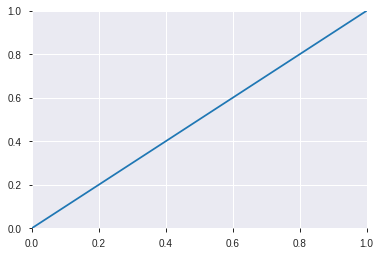

In [ ]:
plt.plot(gg['time'], gg['open'])

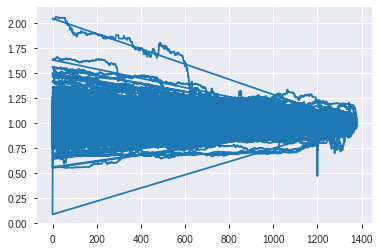

In [ ]:
plt.plot(train_x_df['time'], train_x_df['open'])

#plt.plot(d_["일시"], d_["기온(°C)"], "-", color='grey', label=str(spot_))

# GBM


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Get the model and the predictions in (a) - (b)
def GBM(q, X_train, Y_train, X_valid, Y_valid, X_test):
    
   # (a) Modeling  
   mod = GradientBoostingRegressor(loss='quantile', alpha=q,
                                n_estimators=500, max_depth=8,
                                learning_rate=.01, min_samples_leaf=20,
                                min_samples_split=20)
   mod.fit(X_train_1, Y_train_1)

   # (b) Predictions
   pred = pd.Series(mod.predict(X_test).round(2))
   return pred, mod

def train_data(X_train, Y_train, X_valid, Y_valid, X_test):

  GBM_models=[]
  GBM_actual_pred = pd.DataFrame()

  for q in quantiles:
      pred , model = GBM(q, X_train, Y_train, X_valid, Y_valid, X_test)
      GBM_models.append(model)
      GBM_actual_pred = pd.concat([GBM_actual_pred,pred],axis=1)
  GBM_actual_pred.columns = quantiles

  return GBM_models, GBM_actual_pred


## 수정된 baseline


In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import random

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_raw = pd.read_csv('/content/drive/MyDrive/Dacon/태양광 발전량 예측 AI 경진대회/train/train.csv')
train= train_raw

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Dacon/태양광 발전량 예측 AI 경진대회/sample_submission.csv')

In [ ]:
train.iloc[52511:]

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
52511,1093,23,30,0,0,1.9,74.99,-4,0.000000
52512,1094,0,0,0,0,1.7,74.22,-4,0.000000
52513,1094,0,30,0,0,1.6,74.23,-4,0.000000
52514,1094,1,0,0,0,1.5,74.64,-4,0.000000
52515,1094,1,30,0,0,1.7,74.65,-4,0.000000
52516,1094,2,0,0,0,2.0,74.35,-4,0.000000
52517,1094,2,30,0,0,2.3,74.35,-4,0.000000
52518,1094,3,0,0,0,2.7,72.25,-4,0.000000
52519,1094,3,30,0,0,2.7,72.26,-4,0.000000
52520,1094,4,0,0,0,2.8,70.20,-4,0.000000


In [ ]:
train.iloc[:48]

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.000000
1,0,0,30,0,0,1.5,69.06,-12,0.000000
2,0,1,0,0,0,1.6,71.78,-12,0.000000
3,0,1,30,0,0,1.6,71.75,-12,0.000000
4,0,2,0,0,0,1.6,75.20,-12,0.000000
5,0,2,30,0,0,1.5,69.29,-11,0.000000
6,0,3,0,0,0,1.5,72.56,-11,0.000000
7,0,3,30,0,0,1.4,72.55,-11,0.000000
8,0,4,0,0,0,1.3,74.62,-11,0.000000
9,0,4,30,0,0,1.3,74.61,-11,0.000000


In [ ]:
train['Target1'] = train['TARGET'].shift(-48).fillna(method='ffill')
train.iloc[49:96]

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,Target1
49,1,0,30,0,0,1.6,90.68,-10,0.000000,0.000000
50,1,1,0,0,0,1.6,88.11,-11,0.000000,0.000000
51,1,1,30,0,0,1.6,88.11,-11,0.000000,0.000000
52,1,2,0,0,0,1.6,90.85,-11,0.000000,0.000000
53,1,2,30,0,0,1.6,90.84,-11,0.000000,0.000000
54,1,3,0,0,0,1.7,93.78,-12,0.000000,0.000000
55,1,3,30,0,0,1.7,93.77,-12,0.000000,0.000000
56,1,4,0,0,0,1.7,90.46,-12,0.000000,0.000000
57,1,4,30,0,0,1.6,90.46,-12,0.000000,0.000000
58,1,5,0,0,0,1.6,87.34,-12,0.000000,0.000000


In [ ]:
xx=train_raw

#xx.iloc[:-96]
xx

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,Target1
0,0,0,0,0,0,1.5,69.08,-12,0.0,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
52555,1094,21,30,0,0,2.4,70.70,-4,0.0,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0,0.0


In [ ]:
def preprocess_data(data, is_train=True):
    
    temp = data.copy()
    temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]

    if is_train==True:          
    
        temp['Target1'] = temp['TARGET'].shift(-48).fillna(method='ffill')
        temp['Target2'] = temp['TARGET'].shift(-48*2).fillna(method='ffill')
        temp = temp.dropna()
        
        return temp.iloc[:-96] # 왜 마지막 2일을 빼고 학습?

    elif is_train==False:
       
        temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]
                              
        return temp.iloc[-48:, :] # 왜 마지막 날들만 빼서 데이터를 모으지?


df_train = preprocess_data(train)
df_train.iloc[:48]

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
0,0,0.000000,0,0,1.5,69.08,-12,0.000000,0.000000
1,0,0.000000,0,0,1.5,69.06,-12,0.000000,0.000000
2,1,0.000000,0,0,1.6,71.78,-12,0.000000,0.000000
3,1,0.000000,0,0,1.6,71.75,-12,0.000000,0.000000
4,2,0.000000,0,0,1.6,75.20,-12,0.000000,0.000000
5,2,0.000000,0,0,1.5,69.29,-11,0.000000,0.000000
6,3,0.000000,0,0,1.5,72.56,-11,0.000000,0.000000
7,3,0.000000,0,0,1.4,72.55,-11,0.000000,0.000000
8,4,0.000000,0,0,1.3,74.62,-11,0.000000,0.000000
9,4,0.000000,0,0,1.3,74.61,-11,0.000000,0.000000


In [ ]:
df_train.tail()

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
52459,21,0.0,0,0,3.5,55.97,-1,0.0,0.0
52460,22,0.0,0,0,3.9,54.23,-2,0.0,0.0
52461,22,0.0,0,0,4.1,54.21,-2,0.0,0.0
52462,23,0.0,0,0,4.3,56.46,-2,0.0,0.0
52463,23,0.0,0,0,4.1,56.44,-2,0.0,0.0


In [ ]:
df_test = []

for i in range(81):
    file_path = '/content/drive/MyDrive/Dacon/태양광 발전량 예측 AI 경진대회/test/' + str(i) + '.csv'
    temp = pd.read_csv(file_path)
    temp = preprocess_data(temp, is_train=False)
    df_test.append(temp)

X_test = pd.concat(df_test)
X_test

## 이건 preprocess_data라는 함수때문에 각각 test 파일의 마지막 하루만 뽑아서 81일동안 합쳐서 3888개의 행이 나온거임
## 왜 마지막 날만 뽑았을까?

,Hour,TARGET,DHI,DNI,WS,RH,T
288,0,0.0,0,0,0.8,80.92,-2.8
289,0,0.0,0,0,0.9,81.53,-2.9
290,1,0.0,0,0,1.0,79.91,-3.0
291,1,0.0,0,0,0.9,79.91,-3.0
292,2,0.0,0,0,0.9,77.20,-3.0
...,...,...,...,...,...,...,...
331,21,0.0,0,0,0.8,63.35,13.7
332,22,0.0,0,0,0.7,64.82,13.1
333,22,0.0,0,0,0.7,66.10,12.8
334,23,0.0,0,0,0.6,67.64,12.4


In [ ]:
X_test = X_test[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]
X_test

,Hour,TARGET,DHI,DNI,WS,RH,T
288,0,0.0,0,0,0.8,80.92,-2.8
289,0,0.0,0,0,0.9,81.53,-2.9
290,1,0.0,0,0,1.0,79.91,-3.0
291,1,0.0,0,0,0.9,79.91,-3.0
292,2,0.0,0,0,0.9,77.20,-3.0
...,...,...,...,...,...,...,...
331,21,0.0,0,0,0.8,63.35,13.7
332,22,0.0,0,0,0.7,64.82,13.1
333,22,0.0,0,0,0.7,66.10,12.8
334,23,0.0,0,0,0.6,67.64,12.4


In [ ]:
df_train.iloc[:, -1]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
52459    0.0
52460    0.0
52461    0.0
52462    0.0
52463    0.0
Name: Target2, Length: 52464, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -2], test_size=0.3, random_state=0)
X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -1], test_size=0.3, random_state=0)

In [ ]:
#X_train_1.head()
X_valid_1.head()

,Hour,TARGET,DHI,DNI,WS,RH,T
47237,2,0.000000,0,0,1.1,80.65,14
49429,18,0.000000,0,0,0.5,53.20,0
27337,12,84.996275,330,615,3.4,23.19,32
28311,19,0.000000,0,0,0.7,50.55,17
5361,16,21.957266,185,116,0.6,45.08,13


In [ ]:
# 이거 밑에는 lgbm

In [ ]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
from lightgbm import LGBMRegressor

# Get the model and the predictions in (a) - (b)
def LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test):
    
    # (a) Modeling  
    model = LGBMRegressor(objective='quantile', alpha=q,
                         n_estimators=1000, bagging_fraction=0.7, learning_rate=0.001, subsample=0.7)                   
                         
                         
    model.fit(X_train, Y_train, eval_metric = ['quantile'], 
          eval_set=[(X_valid, Y_valid)], early_stopping_rounds=500, verbose=500)

    # (b) Predictions
    pred = pd.Series(model.predict(X_test).round(2))
    return pred, model

In [ ]:
# Target 예측

def train_data(X_train, Y_train, X_valid, Y_valid, X_test):

    LGBM_models=[]
    LGBM_actual_pred = pd.DataFrame()

    for q in quantiles:
        print(q)
        pred , model = LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test)
        LGBM_models.append(model)
        LGBM_actual_pred = pd.concat([LGBM_actual_pred,pred],axis=1)

    LGBM_actual_pred.columns=quantiles
    
    return LGBM_models, LGBM_actual_pred

## GBM

In [ ]:
#데이터 전처리한것은 앞에 수정된 Baseline꺼 그대로 사용하고 모델만 GBM으로 바꿔서 적용한것
#이게 현재까지는 젤 점수 높게 나왔음

# 데이콘에 baseline code는 LGBM이고 이건 돌리는데 조금 오래걸리지만 해본거임

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Get the model and the predictions in (a) - (b)
def GBM(q, X_train, Y_train, X_valid, Y_valid, X_test):
    
   # (a) Modeling  
   mod = GradientBoostingRegressor(loss='quantile', alpha=q,
                                n_estimators=500, max_depth=8,
                                learning_rate=.01, min_samples_leaf=20,
                                min_samples_split=20)
   mod.fit(X_train, Y_train)

   # (b) Predictions
   pred = pd.Series(mod.predict(X_test).round(2))
   return pred, mod

def train_data(X_train, Y_train, X_valid, Y_valid, X_test):

  GBM_models=[]
  GBM_actual_pred = pd.DataFrame()

  for q in quantiles:
      pred , model = GBM(q, X_train, Y_train, X_valid, Y_valid, X_test)
      GBM_models.append(model)
      GBM_actual_pred = pd.concat([GBM_actual_pred,pred],axis=1)
  GBM_actual_pred.columns = quantiles

  return GBM_models, GBM_actual_pred

In [ ]:
# Target1
models_1, results_1 = train_data(X_train_1, Y_train_1, X_valid_1, Y_valid_1, X_test)
results_1.sort_index()[:48]

0.1
Training until validation scores don't improve for 500 rounds.
[500]	valid_0's quantile: 1.57622
[1000]	valid_0's quantile: 1.47496
Did not meet early stopping. Best iteration is:
[1000]	valid_0's quantile: 1.47496
0.2
Training until validation scores don't improve for 500 rounds.
[500]	valid_0's quantile: 2.89746
[1000]	valid_0's quantile: 2.55837
Did not meet early stopping. Best iteration is:
[1000]	valid_0's quantile: 2.55837
0.3
Training until validation scores don't improve for 500 rounds.
[500]	valid_0's quantile: 4.03851
[1000]	valid_0's quantile: 3.37003
Did not meet early stopping. Best iteration is:
[1000]	valid_0's quantile: 3.37003
0.4
Training until validation scores don't improve for 500 rounds.
[500]	valid_0's quantile: 5.00764
[1000]	valid_0's quantile: 3.96493
Did not meet early stopping. Best iteration is:
[1000]	valid_0's quantile: 3.96493
0.5
Training until validation scores don't improve for 500 rounds.
[500]	valid_0's quantile: 5.8439
[1000]	valid_0's quantil

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
1,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
2,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
3,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
4,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
5,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
6,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
7,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
8,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
9,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76


In [ ]:
# Target2
models_2, results_2 = train_data(X_train_2, Y_train_2, X_valid_2, Y_valid_2, X_test)
results_2.sort_index()[:48]

0.1
Training until validation scores don't improve for 500 rounds.
[500]	valid_0's quantile: 1.61726
[1000]	valid_0's quantile: 1.51792
Did not meet early stopping. Best iteration is:
[1000]	valid_0's quantile: 1.51792
0.2
Training until validation scores don't improve for 500 rounds.
[500]	valid_0's quantile: 2.96262
[1000]	valid_0's quantile: 2.63248
Did not meet early stopping. Best iteration is:
[1000]	valid_0's quantile: 2.63248
0.3
Training until validation scores don't improve for 500 rounds.
[500]	valid_0's quantile: 4.12481
[1000]	valid_0's quantile: 3.4553
Did not meet early stopping. Best iteration is:
[1000]	valid_0's quantile: 3.4553
0.4
Training until validation scores don't improve for 500 rounds.
[500]	valid_0's quantile: 5.11782
[1000]	valid_0's quantile: 4.05964
Did not meet early stopping. Best iteration is:
[1000]	valid_0's quantile: 4.05964
0.5
Training until validation scores don't improve for 500 rounds.
[500]	valid_0's quantile: 5.96131
[1000]	valid_0's quantile

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.00,0.00,0.00,0.00,0.00,3.31,8.56,14.97,25.23
1,0.00,0.00,0.00,0.00,0.00,3.31,8.56,14.97,25.23
2,0.00,0.00,0.00,0.00,0.00,3.31,8.56,14.97,25.23
3,0.00,0.00,0.00,0.00,0.00,3.31,8.56,14.97,25.23
4,0.00,0.00,0.00,0.00,0.00,3.31,8.56,14.97,25.23
5,0.00,0.00,0.00,0.00,0.00,3.31,8.56,14.97,25.23
6,0.00,0.00,0.00,0.00,0.00,3.31,8.56,14.97,25.23
7,0.00,0.00,0.00,0.00,0.00,3.31,8.56,14.97,25.23
8,0.00,0.00,0.00,0.00,0.00,3.31,8.56,14.97,25.23
9,0.00,0.00,0.00,0.00,0.00,3.31,8.56,14.97,25.23


In [ ]:
results_1.sort_index().iloc[:48]

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
1,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
2,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
3,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
4,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
5,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
6,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
7,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
8,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76
9,0.00,0.00,0.00,0.00,0.00,3.38,8.66,15.04,26.76


In [ ]:
results_2.sort_index()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.0,0.0,0.0,0.0,3.31,8.56,14.97,25.23
1,0.0,0.0,0.0,0.0,0.0,3.31,8.56,14.97,25.23
2,0.0,0.0,0.0,0.0,0.0,3.31,8.56,14.97,25.23
3,0.0,0.0,0.0,0.0,0.0,3.31,8.56,14.97,25.23
4,0.0,0.0,0.0,0.0,0.0,3.31,8.56,14.97,25.23
...,...,...,...,...,...,...,...,...,...
3883,0.0,0.0,0.0,0.0,0.0,3.31,8.56,14.97,25.23
3884,0.0,0.0,0.0,0.0,0.0,3.31,8.56,14.97,25.23
3885,0.0,0.0,0.0,0.0,0.0,3.31,8.56,14.97,25.23
3886,0.0,0.0,0.0,0.0,0.0,3.31,8.56,14.97,25.23


In [ ]:
print(results_1.shape, results_2.shape)

(3888, 9) (3888, 9)


In [ ]:
submission.loc[submission.id.str.contains("Day7"), "q_0.1":] = results_1.sort_index().values
submission.loc[submission.id.str.contains("Day8"), "q_0.1":] = results_2.sort_index().values
submission

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.0,0.0,0.0,0.0,0.0,3.38,8.66,15.04,26.76
1,0.csv_Day7_0h30m,0.0,0.0,0.0,0.0,0.0,3.38,8.66,15.04,26.76
2,0.csv_Day7_1h00m,0.0,0.0,0.0,0.0,0.0,3.38,8.66,15.04,26.76
3,0.csv_Day7_1h30m,0.0,0.0,0.0,0.0,0.0,3.38,8.66,15.04,26.76
4,0.csv_Day7_2h00m,0.0,0.0,0.0,0.0,0.0,3.38,8.66,15.04,26.76
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,3.31,8.56,14.97,25.23
7772,80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,3.31,8.56,14.97,25.23
7773,80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,3.31,8.56,14.97,25.23
7774,80.csv_Day8_23h00m,0.0,0.0,0.0,0.0,0.0,3.31,8.56,14.97,25.23


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/태양광 발전량 예측 AI 경진대회/GBMsub.csv', index=False)

# 랜덤 포레스트 (미완성)

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import random

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_raw = pd.read_csv('/content/drive/MyDrive/Dacon/태양광 발전량 예측 AI 경진대회/train/train.csv')
train= train_raw

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Dacon/태양광 발전량 예측 AI 경진대회/sample_submission.csv')

In [ ]:
def transform(dataset, target, start_index, end_index, history_size,
                      target_size, step):
    data = []
    labels = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
    for i in range(start_index, end_index, 48):
        indices = range(i-history_size, i, step)
        data.append(np.ravel(dataset[indices].T))
        labels.append(target[i:i+target_size])
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# x_col =['DHI','DNI','WS','RH','T','TARGET']
x_col =['TARGET']
y_col = ['TARGET']

dataset = train.loc[:,x_col].values
label = np.ravel(train.loc[:,y_col].values)

past_history = 48 * 2
future_target = 48 * 2

### transform train
train_data, train_label = transform(dataset, label, 0,None, past_history,future_target, 1)
### transform test
test = []
for i in range(81):
    data = []
    tmp = pd.read_csv('/content/drive/MyDrive/Dacon/태양광 발전량 예측 AI 경진대회/test/' + str(i) + '.csv')
    tmp = tmp.loc[:, x_col].values
    tmp = tmp[-past_history:,:]
    data.append(np.ravel(tmp.T))
    data = np.array(data)
    test.append(data)
test = np.concatenate(test, axis=0)

In [ ]:
from sklearn import ensemble
N_ESTIMATORS = 1000
rf = ensemble.RandomForestRegressor(n_estimators=N_ESTIMATORS,
                                    max_features=1, random_state=0,
                                    max_depth = 5,
                                    verbose=True,
                                    n_jobs=-1)
rf.fit(train_data, train_label)

rf_preds = []
for estimator in rf.estimators_:
    rf_preds.append(estimator.predict(test))
rf_preds = np.array(rf_preds)

for i, q in enumerate(np.arange(0.1, 1, 0.1)):
    y_pred = np.percentile(rf_preds, q * 100, axis=0)
    submission.iloc[:, i] = np.ravel(y_pred)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.3s finished


In [ ]:
submission

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/태양광 발전량 예측 AI 경진대회/랜포1.csv', index=True)

#랜포(깃허브)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.quantile_regression as Q_reg
import matplotlib.pyplot as plt

In [ ]:
X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -2], test_size=0.3, random_state=0)
X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -1], test_size=0.3, random_state=0)

In [ ]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Get the model, the cofficients and the predictions in (a) - (c)
def Qreg(q, X_train, Y_train, X_valid, Y_valid, X_test):
   # (a) Modeling 
   mod = Q_reg.QuantReg(Y_train, X_train).fit(q=q)

    
   # (c) Predictions
   pred = pd.Series(mod.predict(X_test).round(2))
   return pred, mod

def train_data(X_train, Y_train, X_valid, Y_valid, X_test):
  
  RF_models= []
  Qreg_actual_pred = pd.DataFrame()

# Get the actual and quantile predictions
  for q in quantiles:
      pred, model = Qreg(X_train, Y_train, X_valid, Y_valid, X_test)
      RF_models.append(model)
      Qreg_actual_pred = pd.concat([Qreg_actual_pred,pred],axis=1)

  Qreg_actual_pred.columns=quantiles
  Qreg_actual_pred

In [ ]:
X_test

,Hour,TARGET,DHI,DNI,WS,RH,T
288,0,0.0,0,0,0.8,80.92,-2.8
289,0,0.0,0,0,0.9,81.53,-2.9
290,1,0.0,0,0,1.0,79.91,-3.0
291,1,0.0,0,0,0.9,79.91,-3.0
292,2,0.0,0,0,0.9,77.20,-3.0
...,...,...,...,...,...,...,...
331,21,0.0,0,0,0.8,63.35,13.7
332,22,0.0,0,0,0.7,64.82,13.1
333,22,0.0,0,0,0.7,66.10,12.8
334,23,0.0,0,0,0.6,67.64,12.4


In [ ]:
# Target1
models_1, results_1 = train_data(X_train_1, Y_train_1, X_valid_1, Y_valid_1, X_test)
results_1.sort_index()[:48]

TypeError: ignored

In [ ]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Get the model, the cofficients and the predictions in (a) - (c)
def Qreg(q):
   # (a) Modeling 
   mod2 = Q_reg.QuantReg(Y_train_2, X_train_2).fit(q=q)

    
   # (c) Predictions
   pred = pd.Series(mod2.predict(X_test).round(2))
   return pred


Qreg_actual_pred = pd.DataFrame()

# Get the actual and quantile predictions
for q in quantiles:
    pred = Qreg(q)
    Qreg_actual_pred2 = pd.concat([Qreg_actual_pred,pred],axis=1)

Qreg_actual_pred2.columns=quantiles
Qreg_actual_pred2

ValueError: ignored

In [ ]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=0,min_samples_split=10)
rf.fit(X_train_1, Y_train_1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Get the predictions of all trees for all observations
# Each observation has N predictions from the N trees
pred_Q = pd.DataFrame()
for pred in rf.estimators_:
    temp = pd.Series(pred.predict(X_test).round(2))
    pred_Q = pd.concat([pred_Q,temp],axis=1)
pred_Q.head()

In [ ]:
RF_actual_pred = pd.DataFrame()

for q in quantiles:
    s = pred_Q.quantile(q=q, axis=1)
    RF_actual_pred = pd.concat([RF_actual_pred,s],axis=1,sort=False)
   
RF_actual_pred.columns=quantiles
RF_actual_pred['actual'] = Y_test
RF_actual_pred['interval'] = RF_actual_pred[np.max(quantiles)] - RF_actual_pred[np.min(quantiles)]
RF_actual_pred = RF_actual_pred.sort_values('interval')
RF_actual_pred = RF_actual_pred.round(2)
RF_actual_pred